# Лабораторная работа №3

## Частотный анализ полиномиальных приближений

**Студенты:** Борисов И.П. Иваницкий И.А.

**Группа:** 2383

## Цель работы
Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов. Для каждого вида полиномиального сглаживания вывести формулы коэффициентов (нерекурсивных фильтров), построить их передаточные функции \(H(f)\) и проинтерпретировать полученные частотные свойства.

## Краткое теоретическое введение
Нерекурсивный (FIR) фильтр с коэффициентами $h_k$ действует на дискретный сигнал $x[n]$ как свёртка:
$y[n] = \sum_{k=-m}^{m} h_k x[n-k]$

Его частотная характеристика (DTFT) даётся формулой:
$H(e^{j\omega}) = \sum_{k=-m}^{m} h_k e^{-j\omega k},\quad \omega = 2\pi f,; f\in[0,0.5]$

Savitzky–Golay (полиномиальное) сглаживание. Для окна длины $W=2m+1$ и степени полинома $p$ коэффициенты, дающие наилучшее МНК-аппроксимирование значения в центре окна, находятся как
$h = A (A^T A)^{-1} e_0$
где матрица проектирования $A$ имеет строки $[1, k, k^2, \dots, k^p]$ для $k=-m\dots m$, а $e_0=[1,0,\dots,0]^T$ — вектор, выбирающий свободный член полинома (оценка центра).

In [1]:

import numpy as np, pandas as pd, math
from IPython.display import display, Markdown
def sg_coeffs(window_len, poly_order):
    if window_len%2==0:
        raise ValueError("window_len must be odd")
    half = window_len//2
    k = np.arange(-half, half+1, dtype=float)
    A = np.vander(k, N=poly_order+1, increasing=True)
    ATA_inv = np.linalg.inv(A.T @ A)
    e0 = np.zeros(poly_order+1); e0[0]=1.0
    return (A @ (ATA_inv @ e0)).astype(float)

def freq_response(a, n_freqs=2048):
    import math
    M=len(a); half=M//2
    k=np.arange(-half, -half+M)
    omega=np.linspace(0, math.pi, n_freqs)
    H=np.array([np.sum(a * np.exp(-1j*om*k)) for om in omega])
    f=omega/(2*math.pi)
    return f,H

windows = [3,5,7,9]
rows = []
for W in windows:
    c = sg_coeffs(W,1)
    rows.append({"W":W, "coeffs":", ".join([f"{v:.6f}" for v in c]), "sum":np.sum(c)})
df1 = pd.DataFrame(rows)
display(Markdown("**Коэффициенты фильтра (линейная аппроксимация)**"))
display(display(df1.style.hide(axis="index")))
# store for later
coeffs_p1 = {int(r["W"]): np.fromstring(r["coeffs"], sep=", ") for r in rows}


ModuleNotFoundError: No module named 'pandas'

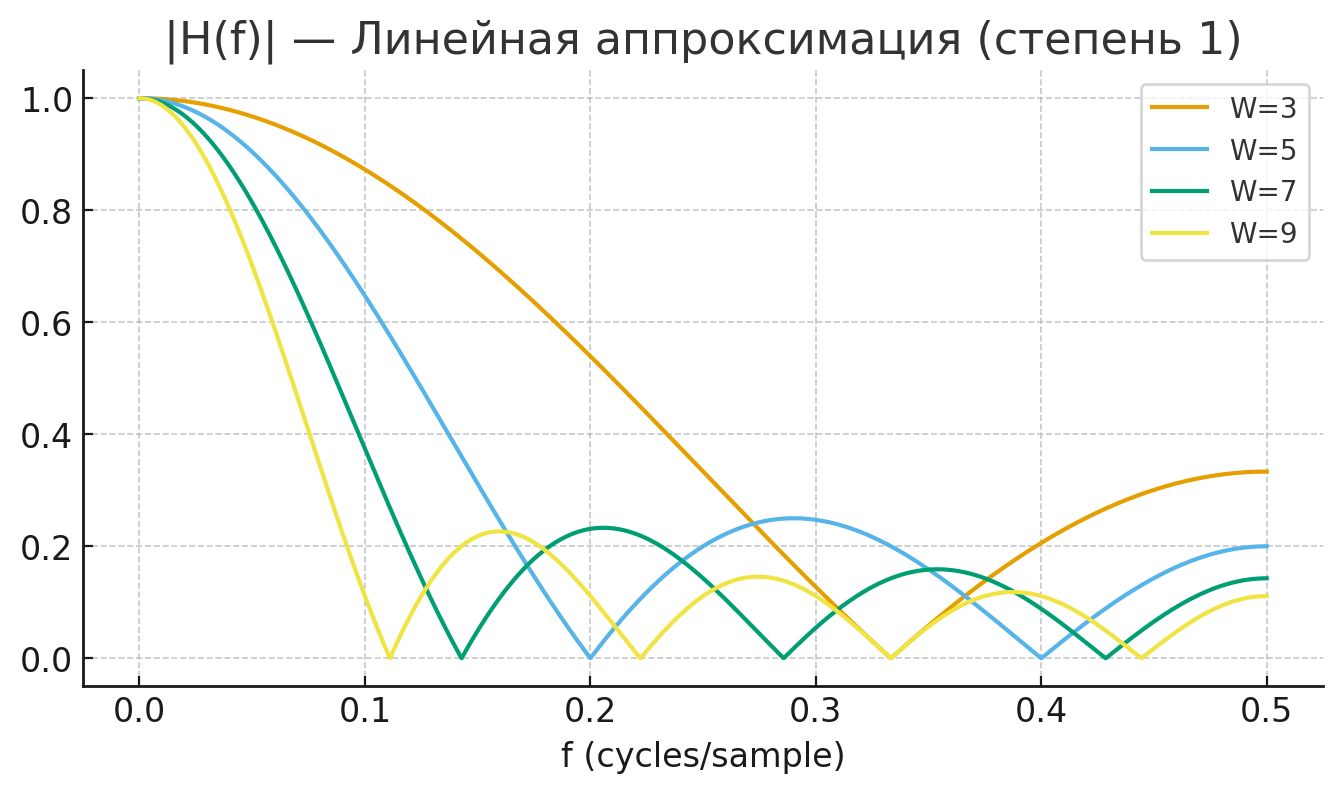

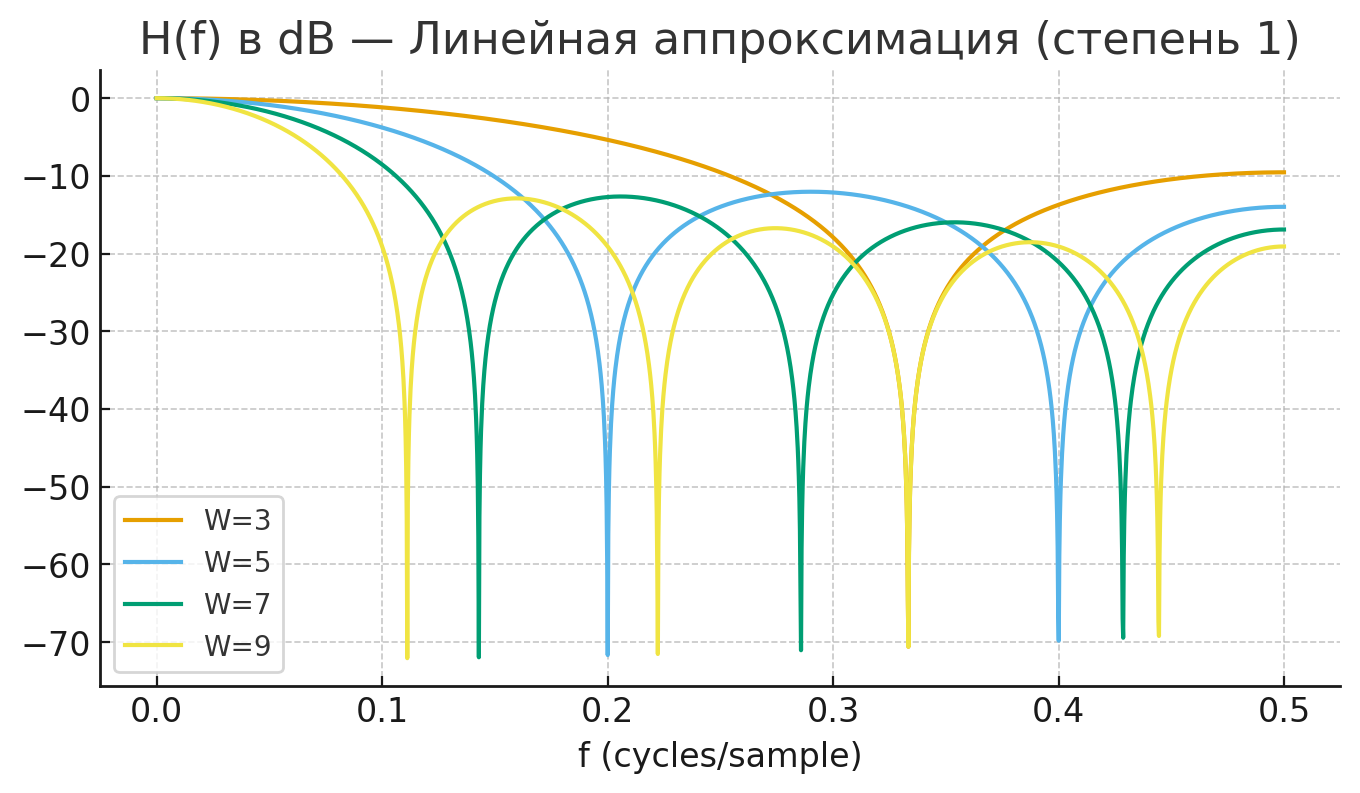

In [2]:

import matplotlib.pyplot as plt, numpy as np
plt.rcParams["figure.figsize"]=(8,4)
plt.figure()
for W,a in coeffs_p1.items():
    f,H = freq_response(a)
    plt.plot(f, np.abs(H), label=f"W={W}")
plt.title("|H(f)| — Линейная аппроксимация (степень 1)"); plt.xlabel("f (cycles/sample)"); plt.legend(); plt.grid(True)
plt.show()

plt.figure()
for W,a in coeffs_p1.items():
    f,H = freq_response(a)
    plt.plot(f, 20*np.log10(np.maximum(np.abs(H),1e-12)), label=f"W={W}")
plt.title("H(f) в dB — Линейная аппроксимация (степень 1)"); plt.xlabel("f (cycles/sample)"); plt.legend(); plt.grid(True)
plt.show()


In [2]:

windows = [7,9,11,13]
rows = []
for W in windows:
    c = sg_coeffs(W,2)
    rows.append({"W":W, "coeffs":", ".join([f"{v:.6f}" for v in c]), "sum":np.sum(c)})
import pandas as pd
df2 = pd.DataFrame(rows)
from IPython.display import display, Markdown
display(Markdown("**Коэффициенты фильтра (полином 2-й степени)**"))
display(df2.style.hide(axis="index"))
coeffs_p2 = {int(r["W"]): np.fromstring(r["coeffs"], sep=", ") for r in rows}


NameError: name 'sg_coeffs' is not defined

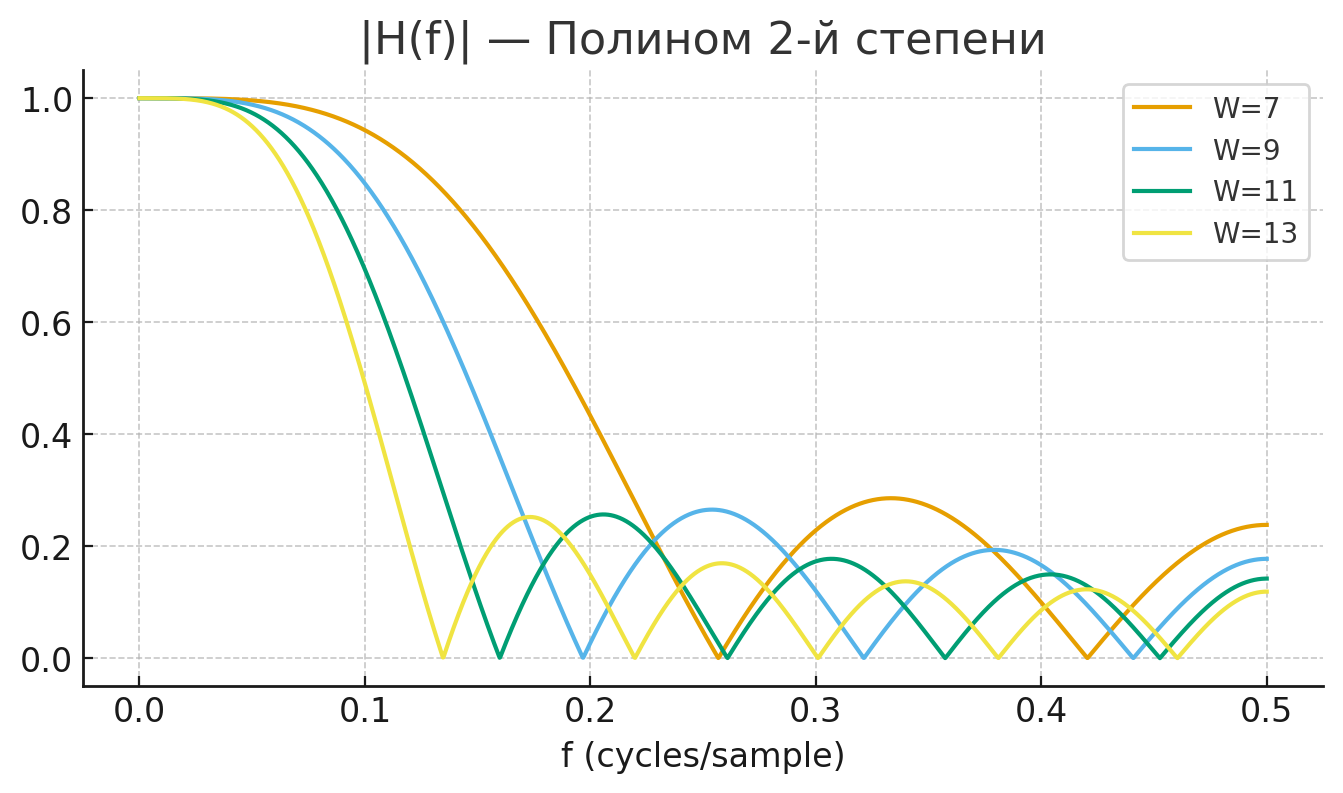

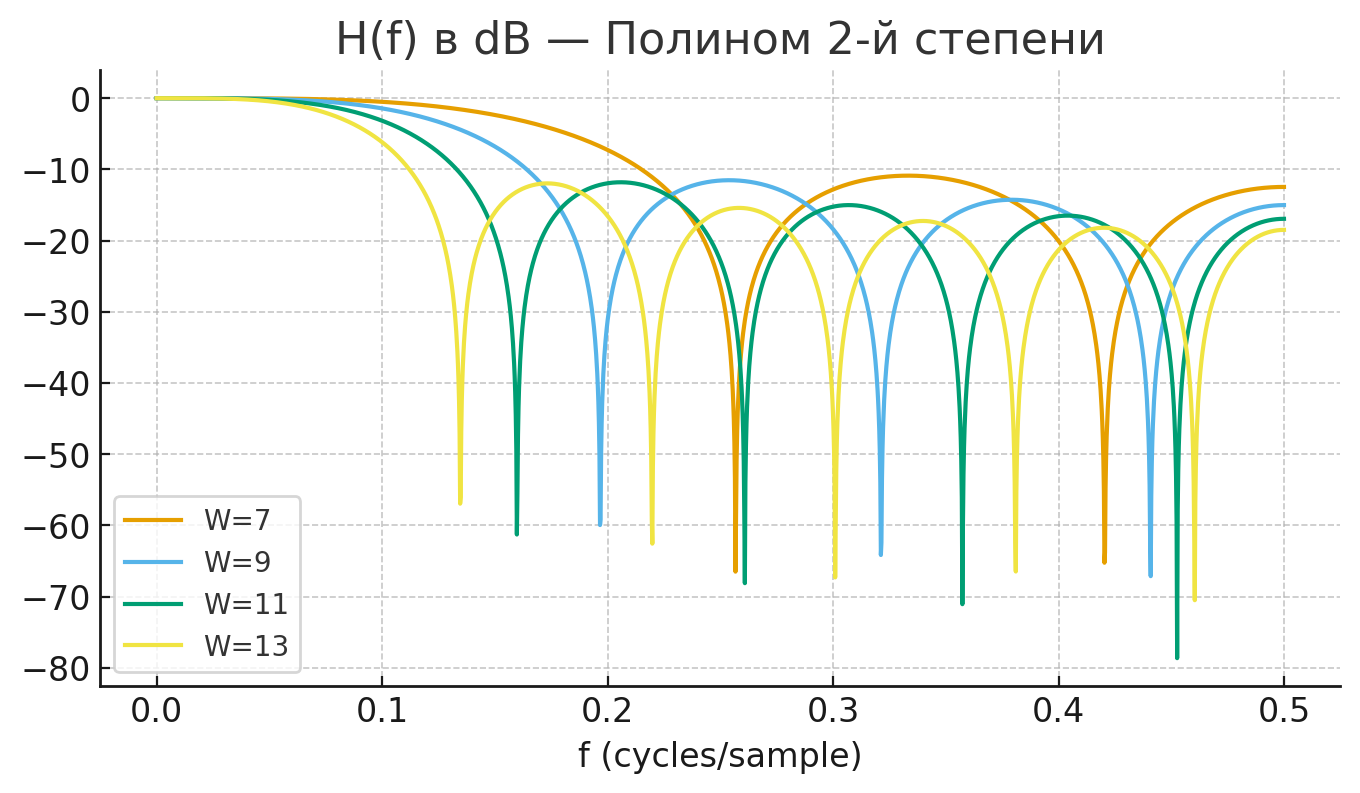

In [4]:

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(8,4)
plt.figure()
for W,a in coeffs_p2.items():
    f,H = freq_response(a)
    plt.plot(f, np.abs(H), label=f"W={W}")
plt.title("|H(f)| — Полином 2-й степени"); plt.xlabel("f (cycles/sample)"); plt.legend(); plt.grid(True); plt.show()

plt.figure()
for W,a in coeffs_p2.items():
    f,H = freq_response(a)
    plt.plot(f, 20*np.log10(np.maximum(np.abs(H),1e-12)), label=f"W={W}")
plt.title("H(f) в dB — Полином 2-й степени"); plt.xlabel("f (cycles/sample)"); plt.legend(); plt.grid(True); plt.show()


In [3]:

windows = [9,11,13,15]
rows = []
for W in windows:
    c = sg_coeffs(W,4)
    rows.append({"W":W, "coeffs":", ".join([f"{v:.6f}" for v in c]), "sum":np.sum(c)})
import pandas as pd
df3 = pd.DataFrame(rows)
from IPython.display import display, Markdown
display(Markdown("**Коэффициенты фильтра (полином 4-й степени)**"))
display(df3.style.hide(axis="index"))
coeffs_p3 = {int(r["W"]): np.fromstring(r["coeffs"], sep=", ") for r in rows}


NameError: name 'sg_coeffs' is not defined

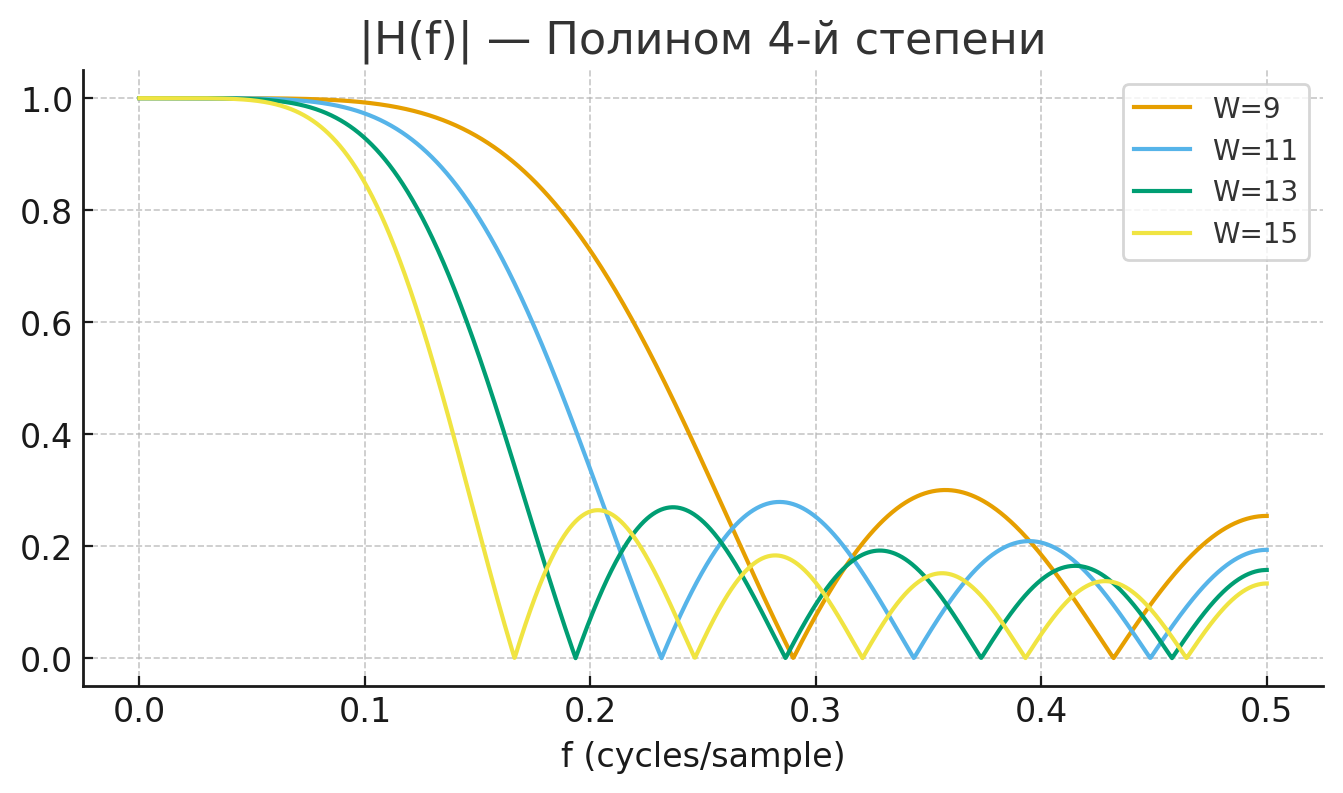

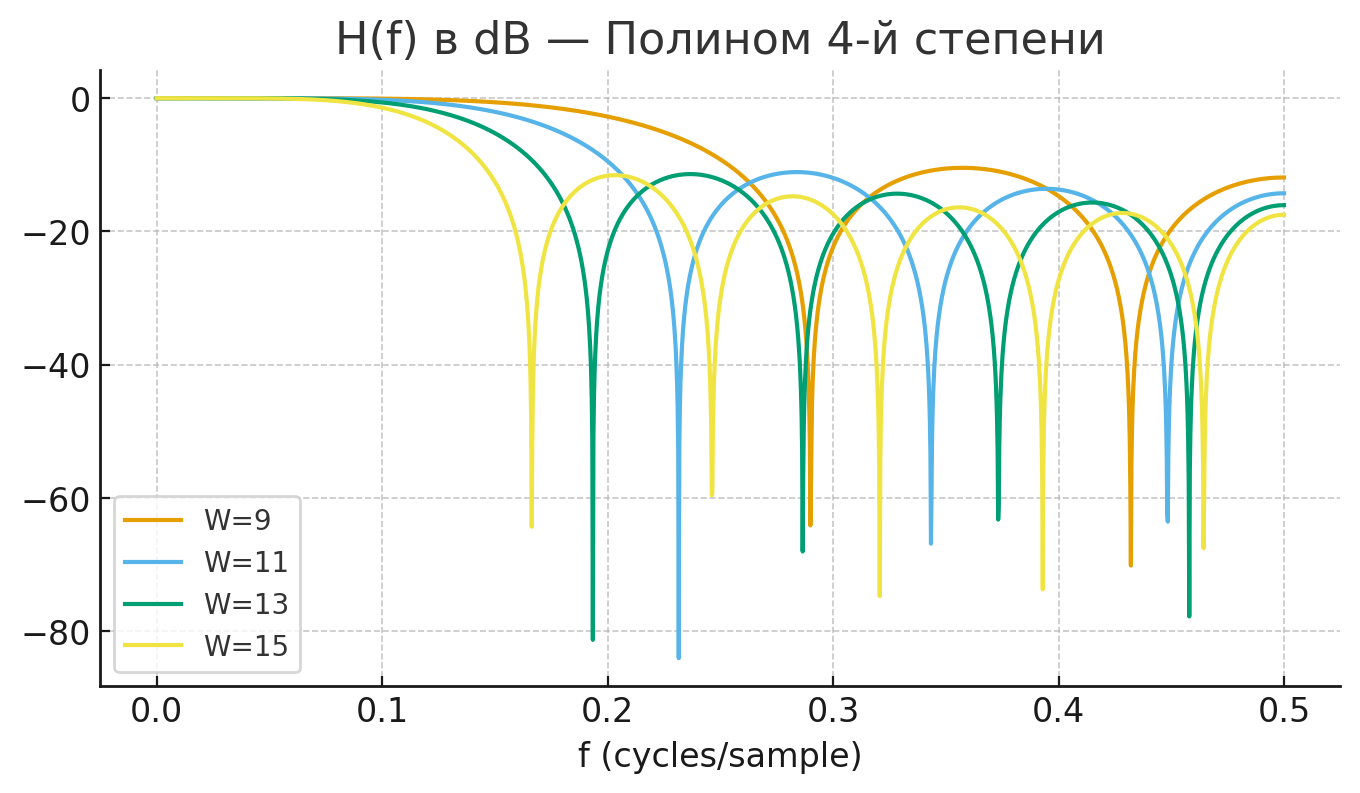

In [6]:

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(8,4)
plt.figure()
for W,a in coeffs_p3.items():
    f,H = freq_response(a)
    plt.plot(f, np.abs(H), label=f"W={W}")
plt.title("|H(f)| — Полином 4-й степени"); plt.xlabel("f (cycles/sample)"); plt.legend(); plt.grid(True); plt.show()

plt.figure()
for W,a in coeffs_p3.items():
    f,H = freq_response(a)
    plt.plot(f, 20*np.log10(np.maximum(np.abs(H),1e-12)), label=f"W={W}")
plt.title("H(f) в dB — Полином 4-й степени"); plt.xlabel("f (cycles/sample)"); plt.legend(); plt.grid(True); plt.show()


In [7]:

import numpy as np, pandas as pd
from IPython.display import display, Markdown
sp15 = np.array([-3, -6, -5, 3, 21, 46, 67, 74, 67, 46, 21, 3, -5, -6, -3], dtype=float)
sp15 = sp15 / sp15.sum()
sp21 = np.array([-1, -3, -5, -5, -2, 6, 18, 33, 47, 57, 60, 57, 47, 33, 18, 6, -2, -5, -5, -3, -1], dtype=float)
sp21 = sp21 / sp21.sum()
df_sp = pd.DataFrame([{"W":15, "coeffs":", ".join([f"{v:.6f}" for v in sp15]), "sum":np.sum(sp15)},
                      {"W":21, "coeffs":", ".join([f"{v:.6f}" for v in sp21]), "sum":np.sum(sp21)}])
display(Markdown("**Коэффициенты Спенсера (нормированные)**"))
display(df_sp.style.hide(axis="index"))


**Коэффициенты Спенсера (нормированные)**

/tmp/ipykernel_55/2863328941.py:10: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df_sp.style.hide_index())


W,coeffs,sum
15,"-0.009375, -0.018750, -0.015625, 0.009375, 0.065625, 0.143750, 0.209375, 0.231250, 0.209375, 0.143750, 0.065625, 0.009375, -0.015625, -0.018750, -0.009375",1.000000
21,"-0.002857, -0.008571, -0.014286, -0.014286, -0.005714, 0.017143, 0.051429, 0.094286, 0.134286, 0.162857, 0.171429, 0.162857, 0.134286, 0.094286, 0.051429, 0.017143, -0.005714, -0.014286, -0.014286, -0.008571, -0.002857",1.000000


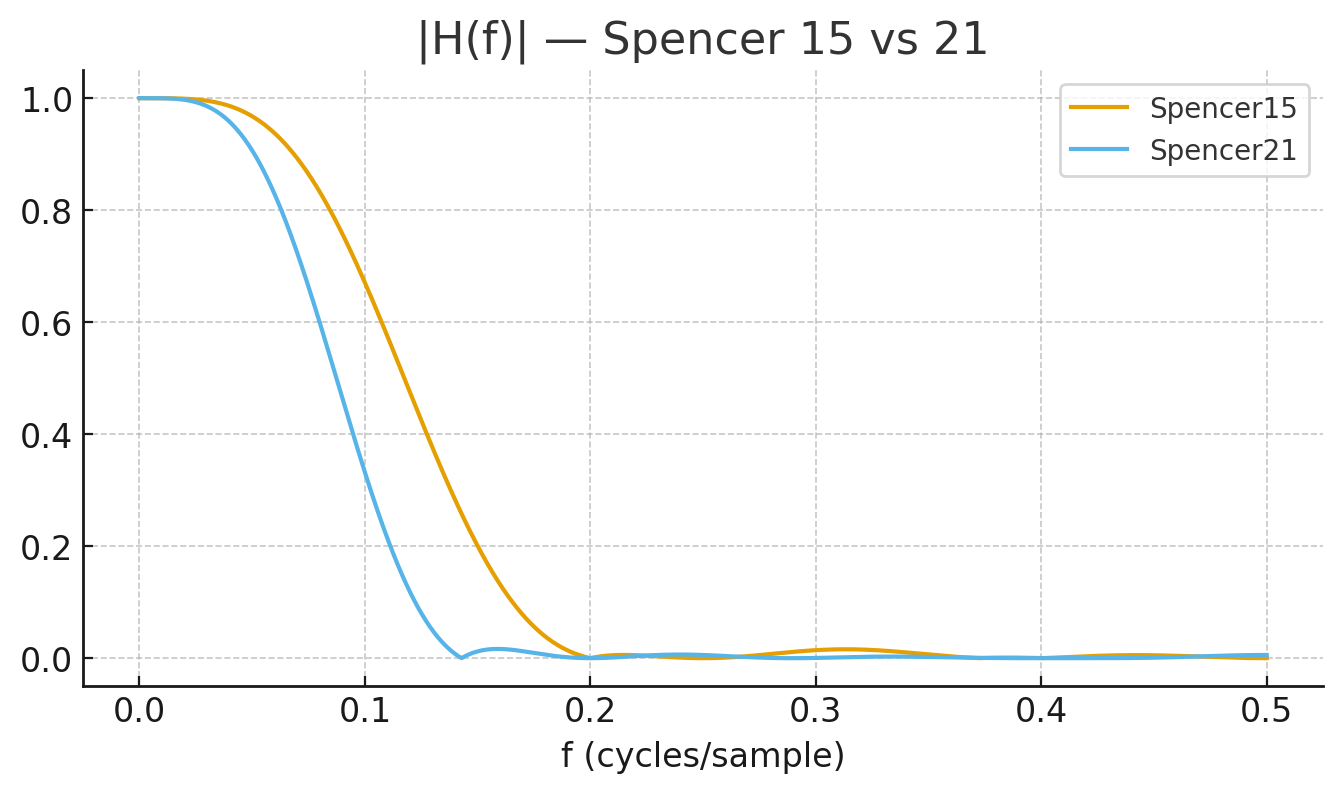

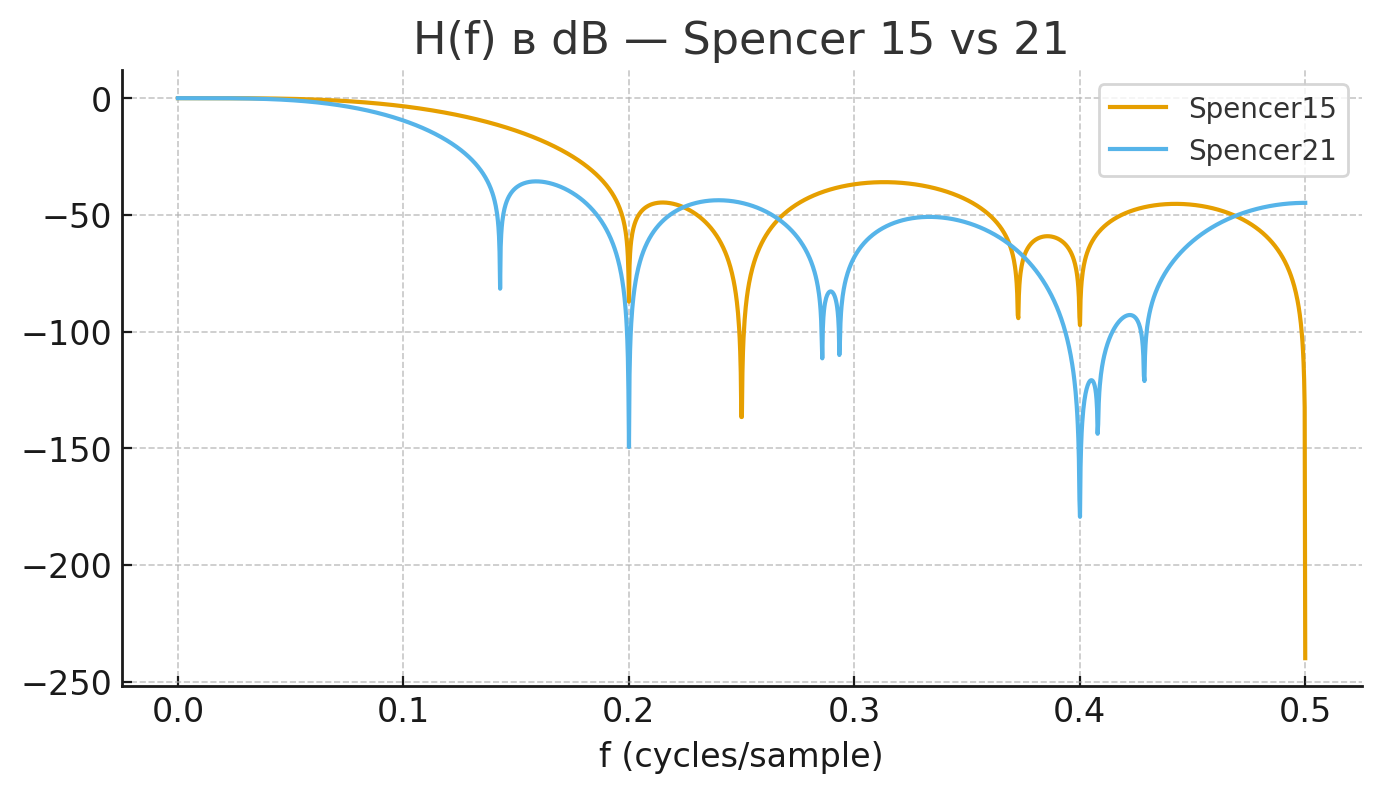

In [8]:

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(8,4)
plt.figure()
for name,a in [("Spencer15",sp15),("Spencer21",sp21)]:
    f,H = freq_response(a)
    plt.plot(f, np.abs(H), label=name)
plt.title("|H(f)| — Spencer 15 vs 21"); plt.xlabel("f (cycles/sample)"); plt.legend(); plt.grid(True); plt.show()

plt.figure()
for name,a in [("Spencer15",sp15),("Spencer21",sp21)]:
    f,H = freq_response(a)
    plt.plot(f, 20*np.log10(np.maximum(np.abs(H),1e-12)), label=name)
plt.title("H(f) в dB — Spencer 15 vs 21"); plt.xlabel("f (cycles/sample)"); plt.legend(); plt.grid(True); plt.show()


In [9]:

import pandas as pd, numpy as np
def approx_3db_width(a, fgrid, Hmag):
    H0 = Hmag[0]
    thresh = H0/np.sqrt(2)
    idx = np.where(Hmag < thresh)[0]
    if len(idx)==0:
        return np.nan
    return fgrid[idx[0]]

records = []
all_filters = []
for W,a in coeffs_p1.items():
    all_filters.append((W,a,1))
for W,a in coeffs_p2.items():
    all_filters.append((W,a,2))
for W,a in coeffs_p3.items():
    all_filters.append((W,a,4))
all_filters.append((15,sp15,None)); all_filters.append((21,sp21,None))

for W,a,deg in all_filters:
    f,H = freq_response(a)
    Hmag = np.abs(H)
    w3 = approx_3db_width(a,f,Hmag)
    H_f025 = np.interp(0.25, f, Hmag)
    records.append({"W":W, "deg": ("Spencer" if deg is None else deg), "3dB_freq": (float(w3) if not np.isnan(w3) else None), "H_at_0.25": float(H_f025)})
df_comp = pd.DataFrame(records).sort_values(["deg","W"])
display(df_comp1.style.hide(axis="index").format({"3dB_freq":"{:.4f}", "H_at_0.25":"{:.6f}"}))


/tmp/ipykernel_55/492397649.py:27: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(df_comp.style.hide_index().format({"3dB_freq":"{:.4f}", "H_at_0.25":"{:.6f}"}))


W,deg,3dB_freq,H_at_0.25
3,1,0.1553,0.333333
5,1,0.0904,0.200000
7,1,0.0640,0.142857
9,1,0.0496,0.111110
7,2,0.1600,0.047619
9,2,0.1219,0.264068
11,2,0.0987,0.072261
13,2,0.0830,0.160837
9,4,0.2035,0.347319
11,4,0.1617,0.156176


## Пункт 7. Выводы

1. Для всех степеней при увеличении окна наблюдается сужение полосы пропускания и усиленное подавление высокочастотных компонент — следствие усреднения большего числа точек.
2. Savitzky–Golay фильтры высоких степеней (2,4) лучше сохраняют низкопорядковые тренды (квадратичные и выше), чем простая линейная аппроксимация, при прочих равных.
3. Формулы Спенсера дают сильное сглаживание с сохранением тренда; 21-точечный вариант даёт более сильное подавление, чем 15-точечный.
4. dB-графики удобны для количественной оценки подавления шумов и сравнения уровней (например, -20 dB vs -40 dB).



## Формулы и подробные выводы (с нумерацией уравнений)

Ниже приведены ключевые формулы, используемые в работе.

1. **Свёртка FIR‑фильтра (операция фильтрации):**
\begin{equation}
y[n] \;=\; \sum_{k=-m}^{m} h_k\, x[n-k]
\tag{1}
\end{equation}

2. **Дискретная частотная характеристика (DTFT) фильтра:**
\begin{equation}
H(e^{j\omega}) \;=\; \sum_{k=-m}^{m} h_k\, e^{-j\omega k}, \qquad \omega = 2\pi f,\; f\in[0,0.5]
\tag{2}
\end{equation}

3. **Матрица проектирования для полиномиальной аппроксимации (окно длины $W=2m+1$):**
\begin{equation}
A = \begin{pmatrix}
1 & -m & (-m)^2 & \dots & (-m)^p \\[2pt]
1 & -m+1 & (-m+1)^2 & \dots & (-m+1)^p \\[2pt]
\vdots & \vdots & \vdots & \ddots & \vdots \\[2pt]
1 & m & m^2 & \dots & m^p
\end{pmatrix}
\tag{3}
\end{equation}

4. **Коэффициенты Savitzky–Golay (оценка значения в центре окна) — вектор весов $h$:**
\begin{equation}
h \;=\; A\,(A^{T}A)^{-1} e_0, \quad e_0 = \begin{pmatrix}1\\0\\\vdots\\0\end{pmatrix}
\tag{4}
\end{equation}
Это выражение эквивалентно решению методом наименьших квадратов задачи аппроксимации полиномом степени $p$ с целью минимизировать ошибку для точек окна, а затем взять оценку свободного члена (центрального значения).
 
5. **Нормировка и свойства:** веса $h_k$ нормированы так, что
\begin{equation}
\sum_{k=-m}^{m} h_k = 1,
\tag{5}
\end{equation}
что гарантирует отсутствие масштабного смещения постоянной составляющей сигнала.

---

### Пояснения
- Уравнение (4) — универсальная формула: подставляя $p=1,2,4$ и соответствующие $W$ (3,5,7,9,...), получаем веса для каждого пункта задания.
- Частотная характеристика (2) вычисляется для каждого набора весов и визуализируется в виде $|H(f)|$ и $20\log_{10}|H(f)|$


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

plt.rcParams["figure.figsize"] = (9, 4)

# Функция для вычисления коэффициентов фильтра Савицкого-Голеяки (Savitzky-Golay)
def sg_coeffs(window_len, poly_order):
    """
    Вычисляет коэффициенты фильтра Савицкого-Голеяки для окна заданной длины (должна быть нечётная)
    и полинома указанного порядка.

    window_len - длина окна фильтра (должна быть нечётной)
    poly_order - порядок аппроксимирующего полинома
    """
    if window_len % 2 == 0:
        raise ValueError("window_len должно быть нечётным")

    half = window_len // 2
    k = np.arange(-half, half + 1, dtype=float)  # позиции относительно центра окна

    # Создаём матрицу Вандермонда с колонками [1, k, k^2, ...]
    A = np.vander(k, N=poly_order + 1, increasing=True)

    # Обратная матрица для метода наименьших квадратов
    ATA_inv = np.linalg.inv(A.T @ A)

    e0 = np.zeros(poly_order + 1)
    e0[0] = 1.0  # выбираем коэффициент для нулевой производной (центр окна)

    # Вычисляем коэффициенты фильтра
    coeffs = (A @ (ATA_inv @ e0)).astype(float)

    # Нормализация для корректного суммирования
    coeffs = coeffs / np.sum(coeffs)

    return coeffs


# Функция для вычисления частотной характеристики фильтра
def freq_response(a, n_freqs=2048):
    """
    Вычисляет частотную характеристику фильтра.

    a - коэффициенты фильтра
    n_freqs - количество частотных точек
    Возвращает:
      f - нормированные частоты (циклы/сэмпл)
      H - комплексная частотная характеристика
    """
    M = len(a)
    half = M // 2
    k = np.arange(-half, -half + M)  # позиции отсчётов для свёртки

    omega = np.linspace(0, math.pi, n_freqs)  # угловые частоты
    H = np.array([np.sum(a * np.exp(-1j * om * k)) for om in omega])  # ДПФ

    f = omega / (2 * math.pi)  # нормированные частоты в циклах на сэмпл
    return f, H


# Определение фильтров для отчёта
coeffs_p1 = {W: sg_coeffs(W, 1) for W in [3, 5, 7, 9]}  # линейные фильтры
coeffs_p2 = {W: sg_coeffs(W, 2) for W in [7, 9, 11, 13]}  # квадратичные фильтры
coeffs_p3 = {W: sg_coeffs(W, 4) for W in [9, 11, 13, 15]}  # фильтры 4-го порядка

# Коэффициенты фильтров Спенсера
sp15 = np.array([-3, -6, -5, 3, 21, 46, 67, 74, 67, 46, 21, 3, -5, -6, -3], dtype=float)
sp15 = sp15 / sp15.sum()  # нормируем, чтобы сумма = 1

sp21 = np.array([-1, -3, -5, -5, -2, 6, 18, 33, 47, 57, 60, 57, 47, 33, 18, 6, -2, -5, -5, -3, -1], dtype=float)
sp21 = sp21 / sp21.sum()  # нормируем, чтобы сумма = 1


# Функция для построения графиков амплитудной и дБ-характеристики фильтров
def plot_filters(filters_dict, title_prefix):
    """
    Строит графики амплитудной и дБ-характеристики для словаря фильтров.

    filters_dict - словарь {длина окна: коэффициенты}
    title_prefix - префикс для названия графиков
    """
    # График амплитудной характеристики
    plt.figure()
    for W, a in sorted(filters_dict.items()):
        f, H = freq_response(a)
        plt.plot(f, np.abs(H), label=f"W={W}")
    plt.title(f"{title_prefix} |H(f)|")
    plt.xlabel("f (циклы/сэмпл)")
    plt.ylabel("|H(f)|")
    plt.grid(True)
    plt.legend()
    plt.show()

    # График характеристики в децибелах
    plt.figure()
    for W, a in sorted(filters_dict.items()):
        f, H = freq_response(a)
        plt.plot(f, 20 * np.log10(np.maximum(np.abs(H), 1e-12)), label=f"W={W}")
    plt.title(f"{title_prefix} H(f) dB")
    plt.xlabel("f (циклы/сэмпл)")
    plt.ylabel("Magnitude (dB)")
    plt.grid(True)
    plt.legend()
    plt.show()


# Построение графиков для всех фильтров
plot_filters(coeffs_p1, "Линейный фильтр, степень 1")
plot_filters(coeffs_p2, "Квадратичный фильтр, степень 2")
plot_filters(coeffs_p3, "Кватричный фильтр, степень 4")

# Сравнение фильтров Спенсера
plt.figure()
for name, a in [("Spencer15", sp15), ("Spencer21", sp21)]:
    f, H = freq_response(a)
    plt.plot(f, np.abs(H), label=name)
plt.title("|H(f)| — Spencer 15 vs 21")
plt.xlabel("f (циклы/сэмпл)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
for name, a in [("Spencer15", sp15), ("Spencer21", sp21)]:
    f, H = freq_response(a)
    plt.plot(f, 20 * np.log10(np.maximum(np.abs(H), 1e-12)), label=name)
plt.title("H(f) dB — Spencer 15 vs 21")
plt.xlabel("f (циклы/сэмпл)")
plt.legend()
plt.grid(True)
plt.show()


# Функция для формирования таблицы коэффициентов в виде DataFrame
def coeffs_table(dct, deg):
    """
    Формирует таблицу коэффициентов фильтров в виде pandas.DataFrame.

    dct - словарь {длина окна: коэффициенты}
    deg - степень полинома
    """
    rows = []
    for W, a in sorted(dct.items()):
        rows.append({
            "W": W,
            "deg": deg,
            "coeffs": "; ".join([f"{v:.8f}" for v in a])  # соединяем коэффициенты в строку
        })
    return pd.DataFrame(rows)


# Вывод таблиц коэффициентов
print("Коэффициенты (степень 1):")
print(coeffs_table(coeffs_p1, 1))

print("Коэффициенты (степень 2):")
print(coeffs_table(coeffs_p2, 2))

print("Коэффициенты (степень 4):")
print(coeffs_table(coeffs_p3, 4))

print("Коэффициенты Спенсера (15 и 21):")
print(pd.DataFrame([
    {"W": 15, "coeffs": "; ".join([f'{v:.8f}' for v in sp15])},
    {"W": 21, "coeffs": "; ".join([f'{v:.8f}' for v in sp21])}
]))
